In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp

From **linear perturbation theory**

We know that the evolution of density perturbations in a universe dominated by fuzzy dark matter (FDM) without self-interactions can be described by the following differential equation:
\begin{equation}
\ddot{\delta_k} + 2 H \dot {\delta_k} - \left[\frac{h^{2}k^{4}}{4 m^{2} a^{4}} - \frac{4 \pi G \bar{\rho_m}(t)}{a^{3}(t)}  \right]\delta_{k} = 0
\end{equation}

For reference, see Cosmological Simulation for Fuzzy by Dark Matter Model by Jiajun Zhang, Hantao Liu and Ming-Chung Chu (2019)

**For matter dominant universe** 

We have
\begin{equation}
a(t) \propto t^{2/3} 
\end{equation}
and therefore
\begin{equation}
H(t) = \frac{2}{3t}
\end{equation}

The average matter density is also given as 
\begin{equation}
\bar{\rho_{t}} = \frac{1}{6 \pi G t^{2}}
\end{equation}


In [2]:
output_path = 'enter_path_here'

In [3]:
#Constant Parameters
hbar = 6.582e-16    # eV s
h = 0.674
G = 4.30091e-9     #Mpc Msun^-1 (km/s)^2
m = 1e-22    #FDM paricle mass in eV 

In [4]:
k_pow = np.arange(-6, 4)   #Mpc^-1
k = 10.0 ** k_pow

length_scale = 2 * np.pi / k    #Mpc
k, length_scale

(array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
        1.e+02, 1.e+03]),
 array([6.28318531e+06, 6.28318531e+05, 6.28318531e+04, 6.28318531e+03,
        6.28318531e+02, 6.28318531e+01, 6.28318531e+00, 6.28318531e-01,
        6.28318531e-02, 6.28318531e-03]))

**For one specific mode i.e. k = 1 Mpc^-1**

In [5]:
i = 6
k_sel = k[i]
length_scale_sel = length_scale[i]

print(f'k: {k_sel} Mpc^-1 |  length_scale: {length_scale_sel} Mpc')

k: 1.0 Mpc^-1 |  length_scale: 6.283185307179586 Mpc


**Define initial conditions a early times**

\begin{equation}
\delta (t) \propto a (t) \propto t^{2/3}
\end{equation}

Therefore, 
\begin{equation}
\dot{\delta} (t) = \frac{2 \delta}{3t}
\end{equation}



In [6]:
def a(t):
    return t**(2/3)

In [7]:
#Setup the ODE
#Convert the 2nd order ODE into a system of first order ODEs
def ode_fdm(t, y):
    u1, u2 = y      #u1 = delta | u2 = delta_dot
    
    H = 2 / (3 * t)
    quantum_term = (hbar**2 * k_sel**4) / (4 * m**2 * a(t)**4)
    grav_term = 2 / (3 * t**2 * a(t)**3)

    #Solve the following coupled 1st order ODEs
    du1_dt = u2
    du2_dt_fdm = -2*H*u2 + (grav_term - quantum_term)*u1
    return [du1_dt, du2_dt_fdm]


def ode_cdm(t, y):
    u1, u2 = y      #u1 = delta | u2 = delta_dot
    
    H = 2 / (3 * t)
    grav_term = 2 / (3 * t**2 * a(t)**3)

    #Solve the following coupled 1st order ODEs
    du1_dt = u2
    du2_dt_cdm = -2*H*u2 + grav_term*u1
    return [du1_dt, du2_dt_cdm]


In [8]:
#Initial Conditions and Time Span
t_i = 1e-2
t_f = 100
t_span = [t_i, t_f]   #Starting and ending interval for t
t_eval = np.logspace(np.log10(t_i), np.log10(t_f), 500)   #Times at which to store the computed solution

delta0 = 1    #Arbitrarily chosen presently
delta_dot0 = (2/(3*t_i)) * delta0

initial_conditions = [delta0, delta_dot0]
initial_conditions

[1, 66.66666666666667]

Text(0, 0.5, 'log a(t)')

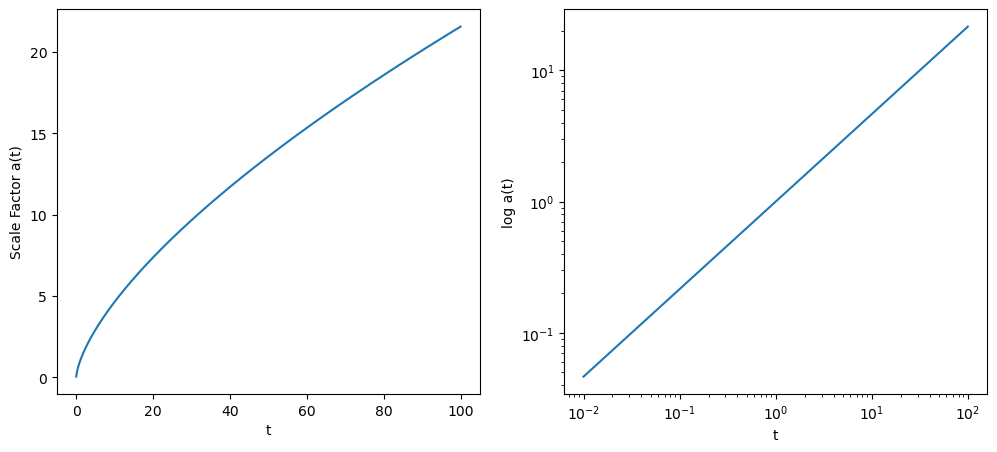

In [9]:
fig, ax  = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(t_eval, a(t_eval), label='Scale Factor a(t)')
ax[1].loglog(t_eval, a(t_eval), label='Scale Factor log a(t)')
ax[0].set_xlabel('t')
ax[0].set_ylabel('Scale Factor a(t)')
ax[1].set_xlabel('t')
ax[1].set_ylabel('log a(t)')

#Note that during matter dominant era, CDM density perturbations must follow behaviour of a(t) 

In [10]:
# Solve the ODE
#solve_cdm = solve_ivp(ode_cdm, t_span, initial_conditions, t_eval = t_eval)

In [11]:
t = solve_cdm.t
delta0_cdm, delta0_dot_cdm = solve_cdm.y[0], solve_cdm.y[1]

# Plot
plt.loglog(t, delta0_cdm,  label="CDM density perturbations")
plt.loglog(t, delta0_dot_cdm,  label="CDM growth rate")
plt.legend()
plt.grid(True)
plt.xlabel("t")
plt.ylabel(r"Density and Growth Rate")
plt.title(f" (k = {k_sel:.1e} Mpc$^{{-1}}$)")
plt.savefig(output_path + f'cdm_density_growth_k={int(k_sel)}Mpc-inv.png', dpi=300)
plt.show()

NameError: name 'solve_cdm' is not defined

In [ ]:
#solve_fdm = solve_ivp(ode_fdm, t_span, initial_conditions, t_eval = t_eval)

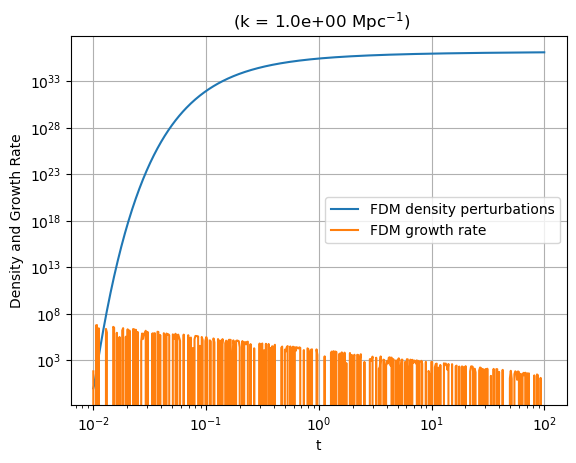

In [ ]:
t = solve_fdm.t
delta0_fdm, delta0_dot_fdm = solve_fdm.y[0], solve_fdm.y[1]

# Plot
plt.loglog(t, delta0_cdm, label="FDM density perturbations")
plt.loglog(t, delta0_dot_fdm,  label="FDM growth rate")
plt.legend()
plt.grid(True)
plt.xlabel("t")
plt.ylabel(r"Density and Growth Rate")
plt.title(f" (k = {k_sel:.1e} Mpc$^{{-1}}$)")
plt.savefig(output_path + f'fdm_density_growth_k={int(k_sel)}Mpc-inv.png', dpi=300)
plt.show()

In [ ]:
#Saving the results
df = pd.DataFrame({
    't': t,
    'delta0_fdm': delta0_fdm,
    'delta0_dot_fdm': delta0_dot_fdm,
    'delta0_cdm': delta0_cdm,
    'delta0_dot_cdm': delta0_dot_cdm
})
df.to_csv(output_path +"fdm_vs_cdm_density_growth.csv", index=False)

NameError: name 't' is not defined

In [ ]:
df =  pd.read_csv(output_path +"fdm_vs_cdm_density_growth.csv")

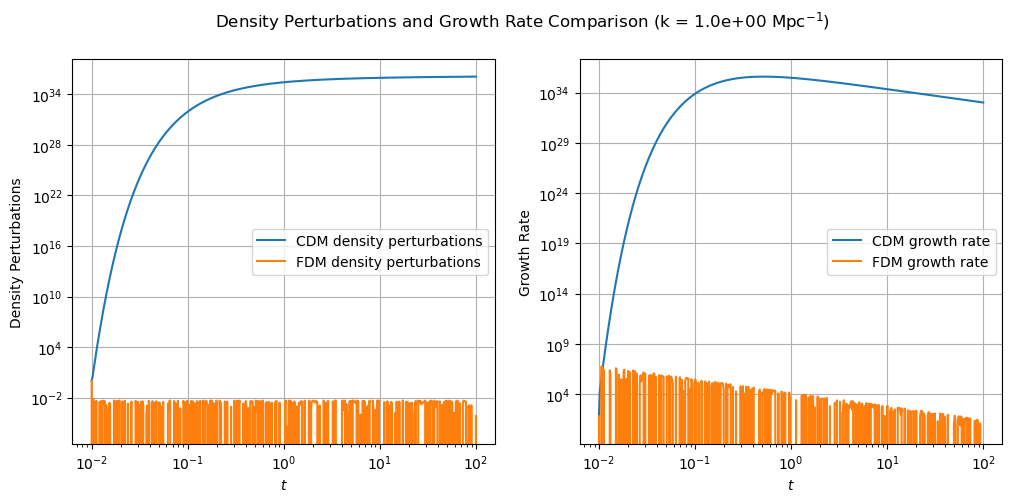

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].loglog(df['t'], df['delta0_cdm'], label="CDM density perturbations")
ax[0].loglog(df['t'], df['delta0_fdm'],   label="FDM density perturbations")
ax[1].loglog(df['t'], df['delta0_dot_cdm'],  label="CDM growth rate")
ax[1].loglog(df['t'], df['delta0_dot_fdm'],  label="FDM growth rate")
ax[0].set_ylabel(r"Density Perturbations")
ax[1].set_ylabel(r"Growth Rate")

ax[0].set_xlabel(r"$t$")
ax[1].set_xlabel(r"$t$")
ax[0].grid(True)
ax[1].grid(True)
ax[0].legend()
ax[1].legend()
fig.suptitle(f"Density Perturbations and Growth Rate Comparison (k = {k_sel:.1e} Mpc$^{{-1}}$)")
fig.savefig(output_path + f'fdm_vs_cdm_density_growth_k={int(k_sel)}Mpc-inv.png', dpi=300)
plt.show()

**For multiple modes**

- To obtain a power spectrum for FDM, we need to repeat above steps for the entire range of k values.
- Is it necessary to estimate a transfer function for FDM? If yes, how is it to be implemented?
- Note that we are only doing the above procedure for matter-dominant time period. Isnt inclusion of radiation dominant era also necessary when evolving using the primordial power spectrum as initial condition?
- How to use the primordial power spectrum as an initial condition? In which step? Refer to documentation on CAMB. 

In [12]:
#TEST
#Note that below, I have not used transfer functions to set initial conditions for different k modes.
#This is just to test the code for solving ODEs for multiple k values.

k_pow = np.arange(-3, 3)   #Mpc^-1
k_val = 10.0 ** k_pow

#Setting the values of hbar and m to 1 to test the code below
hbar = 1
m = 1



In [13]:
def ode_fdm_allkvals(t, y, k):
    u1, u2 = y      #u1 = delta | u2 = delta_dot
    
    H = 2 / (3 * t)
    quantum_term = (hbar**2 * k**4) / (4 * m**2 * a(t)**4)
    grav_term = 2 / (3 * t**2 * a(t)**3)

    #Solve the following coupled 1st order ODEs
    du1_dt = u2
    du2_dt_fdm = -2*H*u2 + (grav_term - quantum_term)*u1
    return [du1_dt, du2_dt_fdm]


fdm_allkvals = []
for k_i in k_val:
    sol_fdm = solve_ivp(
        ode_fdm_allkvals,
        t_span,
        initial_conditions,
        t_eval=t_eval,
        args=(k_i,),
        #method = 'LSODA'
    )

    for j in range(len(t_eval)):
        fdm_allkvals.append(
            {
                't': t_eval[j],
                'k': k_i,
                'delta_fdm': sol_fdm.y[0][j],
                'delta_dot_fdm': sol_fdm.y[1][j]
            }
        )


In [14]:
def ode_cdm_allkvals(t, y, k):
    u1, u2 = y      #u1 = delta | u2 = delta_dot
    
    H = 2 / (3 * t)
    quantum_term = 0
    grav_term = 2 / (3 * t**2 * a(t)**3)

    #Solve the following coupled 1st order ODEs
    du1_dt = u2
    du2_dt_cdm = -2*H*u2 + (grav_term - quantum_term)*u1
    return [du1_dt, du2_dt_cdm]


cdm_allkvals = []
for k_i in k_val:
    sol_cdm = solve_ivp(
        ode_cdm_allkvals,
        t_span,
        initial_conditions,
        t_eval=t_eval,
        args=(k_i,),
        #method = 'LSODA'
    )

    for j in range(len(t_eval)):
        cdm_allkvals.append(
            {
                't': t_eval[j],
                'k': k_i,
                'delta_cdm': sol_cdm.y[0][j],
                'delta_dot_cdm': sol_cdm.y[1][j]
            }
        )


In [15]:
df_fdm_allkvals = pd.DataFrame(fdm_allkvals)
df_cdm_allkvals = pd.DataFrame(cdm_allkvals)

df_fdm_allkvals.to_csv(output_path + 'fdm_density_growth_allkvals.csv', index=False)
df_cdm_allkvals.to_csv(output_path + 'cdm_density_growth_allkvals.csv', index=False)

In [18]:
df_cdm_allkvals

,t,k,delta_cdm,delta_dot_cdm
0,0.010000,0.001,1.000000e+00,6.666667e+01
1,0.010186,0.001,2.361002e+00,1.688480e+04
2,0.010376,0.001,9.826248e+00,7.443498e+04
3,0.010569,0.001,4.158702e+01,3.051719e+05
4,0.010766,0.001,1.718255e+02,1.215658e+06
...,...,...,...,...
2995,92.882923,100.000,1.252462e+36,1.118360e+33
2996,94.613238,100.000,1.254373e+36,1.091192e+33
2997,96.375787,100.000,1.256273e+36,1.064678e+33
2998,98.171170,100.000,1.258161e+36,1.038804e+33


In [19]:
#Obtaining power spectrum for last value of t for all k values
t_final_fdm = df_fdm_allkvals['t'].max()
t_final_cdm = df_cdm_allkvals['t'].max()

df_fdm_final = df_fdm_allkvals[df_fdm_allkvals['t'] == t_final_fdm]
df_cdm_final = df_cdm_allkvals[df_cdm_allkvals['t'] == t_final_cdm]


In [20]:
#As P(k) values are proportional to |delta(k)|^2
df_fdm_final['P_k'] = df_fdm_final['delta_fdm'] **2
df_cdm_final['P_k'] = df_cdm_final['delta_cdm'] **2

/tmp/ipykernel_47876/1451443571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fdm_final['P_k'] = df_fdm_final['delta_fdm'] **2
/tmp/ipykernel_47876/1451443571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cdm_final['P_k'] = df_cdm_final['delta_cdm'] **2


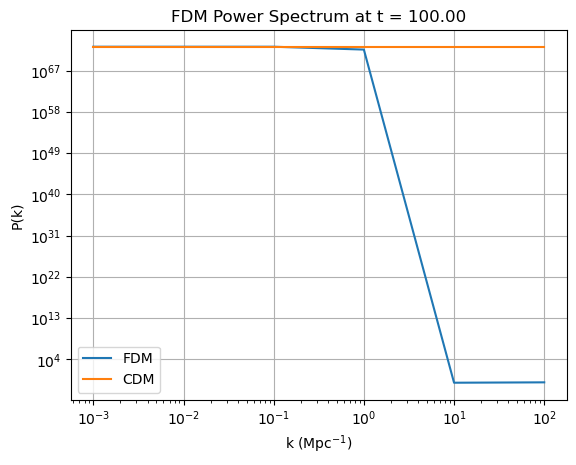

In [22]:
plt.plot(df_fdm_final['k'], df_fdm_final['P_k'], label='FDM')
plt.plot(df_cdm_final['k'], df_cdm_final['P_k'], label='CDM')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k (Mpc$^{-1}$)')
plt.ylabel('P(k)')
plt.title('FDM Power Spectrum at t = {:.2f}'.format(t_final_cdm))
plt.grid(True)
plt.legend()
plt.savefig(output_path + 'cdm_fdm_power_spectrum.png', dpi=300)
plt.show()